In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
import theano.tensor as T
import scipy.stats as stats

# Easy

# 2E1.

In [2]:
# The probability of rain on Monday is equal to:
# 2) Pr(rain|Monday)

# 2E2.

In [3]:
# Pr(Monday|rain) corresponds to:
# 3) The probability that it is Monday, given that it is raining.

# 2E3.

In [4]:
# "The probability that it is Monday, given that it is raining" corresponds to:
# Pr(Monday|rain)

# 2E4.

**Problem:** [...] In light of this statement, what does it mean to say that "the probability of water is 0.7"? 

**Solution**: I think it means that we estimate that the globe is 70% water and 30% land, given that our thumb landed on water 6 out of 9 times. We are not sure of the true proportion of water on this planet, so we use the limited observations we have from our experiment to estimate probability of the 'proportion' parameter.  

# Medium

# 2M1.

In [66]:
"""For set of observations 1) Water,Water,Water"""

def posterior_grid_approx(grid_points=5, success=3, tosses=3):

    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform probability at all grid_points

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

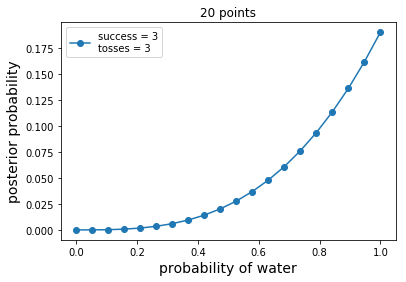

In [67]:
points = 20
w, n = 3, 3
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

In [68]:
"""For set of observations 2) Water,Water,Water,Land"""

def posterior_grid_approx(grid_points=5, success=3, tosses=4):

    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform probability at all grid_points

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

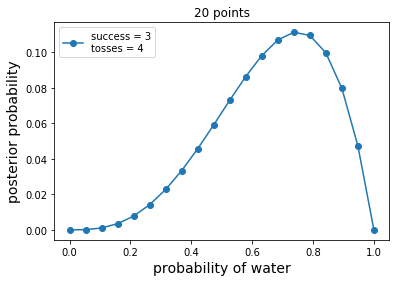

In [69]:
points = 20
w, n = 3, 4
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

In [70]:
"""For set of observations 3) L,W,W,L,W,W,W"""

def posterior_grid_approx(grid_points=5, success=5, tosses=7):

    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform probability at all grid_points

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

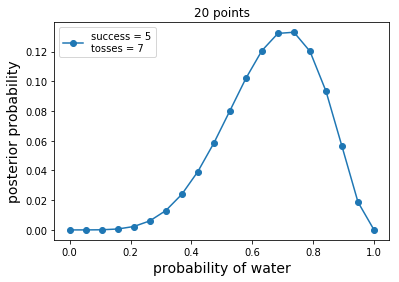

In [71]:
points = 20
w, n = 5, 7
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# 2M2.

In [72]:
"""Now assume a prior for p that is equal to zero when p < 0.5 and is positive constant when p > or equal to 0.5"""
"""I will only do for set of observations L,W,W,L,W,W,W. To do the rest, just change the values like we did above."""

def posterior_grid_approx(grid_points=5, success=5, tosses=7):

    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = (p_grid >= 0.5).astype(int)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

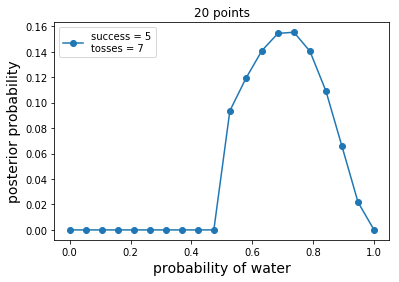

In [73]:
points = 20
w, n = 5, 7
p_grid, posterior = posterior_grid_approx(points, w, n)
plt.plot(p_grid, posterior, 'o-', label='success = {}\ntosses = {}'.format(w, n))
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title('{} points'.format(points))
plt.legend(loc=0);

# 2M3.

**Problem:**
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. 
The Mars globe is 100% land. Further suppose that one of these globes -- you don't know which -- was tossed in the air
produces a 'land' observation. Assume that each globe is equally likely to be tossed. Show that the posterior probability
that the globe was the Earth, conditional on seeing 'land' (Pr(Earth|'land')), is 0.23

**Solution:**

$$Posterior = \frac{(likelihood) * (prior)}{(evidence)}$$

$$P(Earth \mid LandObservation) = \frac{P(LandObservation \mid Earth) * P(Earth)}{P(LandObservation)}$$
* **Likelihood** = P(LandObservation | Earth) = 0.3 because 70% of earth's surface is water

* **Prior** = P(Earth) = 0.5 because each globe is equally likely to be tossed

* **Evidence** = P(LandObservation) = (Probab of Mars) * (Probab of land on Mars) + (Probab of Earth) * (Probab of land on Earth)
* = 0.5*1 + 0.5*0.3
* = 0.65

Therefore:
$$P(Earth \mid LandObservation) = \frac{(0.3 * 0.5)}{0.65} = 0.2307$$


Or, to calculate using Bayes Theorem:

In [126]:
# define prior for earth and mars being tossed
prior = np.array([0.5,0.5])

# define likelihood of 'land' on each globe
likelihood = np.array([0.3,1])

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
posterior

array([0.23076923, 0.76923077])

# 2M4.

**Problem:** Suppose you have a deck with only three cards. Each card has two sides , and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don't know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of this Chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).

**Solution:**

    Card: Side_1/Side_2   |  Black_side_up  |  Other_side_Black  

       A: Black/Black     |       1         |       1   
       A: Black/Black     |       1         |       1
       B: Black/White     |       1         |       0
       B: White/Black     |       0         |       0
       C: White/White     |       0         |       0
       C: White/White     |       0         |       0
       
We see that there are 3 ways that the first side can be black. But, out of the 3 ways that the first side can be black, there are only 2 ways that the other side is black. That is: `2/3` 

Or, to calculate using Bayes Theorem:

$$P(SideDownBlack \mid SideUpBlack) = \frac{P(SideUpBlack \mid SideDownBlack) * P(SideDownBlack)}{P(SideUpBlack)}$$

There are 3 ways in which the second side can be black out of all 6 possibilities
$$P(SideDownBlack)= 3/6$$

There are 3 ways in which the first side up can be black out of all 6 possibilities
$$P(SideUpBlack)=3/6$$

We can see from the very left 'Card' column: given the 3 ways in which the side facing down (side 2) can be black, there are 2 possible ways for the same cards to be black.  
$$P(SideUpBlack \mid SideDownBlack)=2/3$$

Therefore:
$$P(SideDownBlack \mid SideUpBlack)=\frac{2/3*3/6}{3/6}=2/3$$

In [97]:
# define prior for each card: 
# since we don't know which card is drawn, we assign the same probability to each card.
prior = np.array([1,1,1])

# define likelihood: 
# card A has 2 ways for the side facing down to be black
# card B has 1 ways for the side facing down to be black
# card C has 0 ways for the side facing down to be black
likelihood = np.array([2,1,0])

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
print(posterior)
print("\nThe only way for both sides to be black is drawing card A. Posterior probability of card A:")
print(posterior[0])

[0.66666667 0.33333333 0.        ]

The only way for both sides to be black is drawing card A. Posterior probability of card A:
0.6666666666666666


# 2M5.

**Problem:** Now Suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears facing up. Again, calculate the probability that the other side is black.

**Solution:**

    Card: Side_1/Side_2   |  Black_side_up  |  Other_side_Black  

       A: Black/Black     |       1         |       1   
       A: Black/Black     |       1         |       1
       B: Black/White     |       1         |       0
       B: White/Black     |       0         |       0
       C: White/White     |       0         |       0
       C: White/White     |       0         |       0
       D: Black/Black     |       1         |       1
       D: Black/Black     |       1         |       1       
       
We see that there are 5 ways that the first side can be black. But, out of the 5 ways that the first side can be black, there are 4 ways that the other side is black. That is: `4/5` 

In [98]:
# define prior for each card: 
# since we don't know which card is drawn, we assign the same probability to each card.
prior = np.array([1,1,1,1])

# define likelihood: 
# card A has 2 ways for the side facing down to be black
# card B has 1 ways for the side facing down to be black
# card C has 0 ways for the side facing down to be black
# card D has 2 ways for the side facing down to be black
likelihood = np.array([2,1,0,2])

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
print(posterior)
print("\nThe only way for both sides to be black is drawing card A or D. Posterior probability of card A+D:")
print(posterior[0]+posterior[3])

[0.4 0.2 0.  0.4]

The only way for both sides to be black is drawing card A or D. Posterior probability of card A+D:
0.8


# 2M6.

**Problem:** Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it's less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again, suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method as before.

**Solution:**

Given that card B/W is twice as likely to be pulled, we will assume there are 2 B/W cards in the bag. And given that card C is 3 times as likely to be pulled, we will assume there are 3 W/W cards in the bag.

    Card: Side_1/Side_2   |  Black_side_up  |  Other_side_Black  

       A:  Black/Black    |       1         |       1   
       A:  Black/Black    |       1         |       1
       B:  Black/White    |       1         |       0
       B:  White/Black    |       0         |       0
       B2: Black/White    |       1         |       0
       B2: White/Black    |       0         |       0
       C:  White/White    |       0         |       0
       C:  White/White    |       0         |       0
       C2: White/White    |       0         |       0
       C2: White/White    |       0         |       0
       C3: White/White    |       0         |       0
       C3: White/White    |       0         |       0
       
We see that there are 4 ways that the first side can be black. But, out of the 4 ways that the first side can be black, there are 2 ways that the other side is black. That is: `2/4` 

In [109]:
# define prior for each card: 
# card 2 is twice as likely; card 3 is three times as likely to be pulled.
prior = np.array([1,2,3])

# define likelihood: 
# card A has 2 ways for the side facing down to be black
# card B has 1 ways for the side facing down to be black
# card C has 0 ways for the side facing down to be black
likelihood = np.array([2,1,0])

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()
print(posterior)
print("\nThe only way for both sides to be black is drawing card A. Posterior probability of card A:")
print(posterior[0])

[0.5 0.5 0. ]

The only way for both sides to be black is drawing card A. Posterior probability of card A:
0.5


# 2M7.

**Problem:** Assume again the original problem, with a single card showing black side face up. Before looking at the other side, we draw another card from the bag and lay it face up  on the table. The face that is shown on the new card is white. Show that the probability that the first card, the one showing a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat this like the sequence of globe tosses, counting all the ways to see each observation, for each possible first card. 

**Solution:**

Let's count all the the possibilities where the first card will show a black side up, while counting all the possibilities of a second card as well. As a reminder: Card_A is B&B. Card_B is B&W. Card_C is W&W

    Card_1: Side_up/Side_down   |  Card_2: Side_up/Side_down     | (+)  | (+++)
------------------------------------------------------------------------------------------------
       A:  Black1/Black2        |         B:  White/Black        |  +   |  +++
       A:  Black1/Black2        |         B:  Black/White        |      |
       A:  Black2/Black1        |         B:  White/Black        |  +   |  +++   
       A:  Black2/Black1        |         B:  Black/White        |      |
       
       A:  Black1/Black2        |         C:  White1/White2      |  +   |  +++
       A:  Black1/Black2        |         C:  White2/White1      |  +   |  +++
       A:  Black2/Black1        |         C:  White1/White2      |  +   |  +++
       A:  Black2/Black1        |         C:  White2/White1      |  +   |  +++
       
       B:  Black/White          |         A:  Black1/Black2      |      |  
       B:  Black/White          |         A:  Black2/Black1      |      |
       
       B:  Black/White          |         C:  White1/White2      |  +   |
       B:  Black/White          |         C:  White2/White1      |  +   |

(+) We have 8 occasions where the first card is black side up **AND** the second card is white side up.

(+++) However, from those 8, we only have 6 occasions where the first card side down is black as well  

**Therefore:**
6/8=3/4=0.75

# Hard

# 2H1+2H2.

In [5]:
# define prior for earth and mars being tossed
prior = np.array([0.5,0.5])

# define likelihood of 'land' on each globe
likelihood = np.array([0.1,0.2])

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

**Problem1:** Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty from many years of field research. 

Now suppose you are managing a captive panda breeding program. You have a new female panda of unkonwn species, and has just given birth to twins. What is the probability that her next birth will also be twins?

**Problem2:** Recall all the facts from the problem above. Now compute the probability that the panda we have is from species A, assuming we have oberved only the first birth and that it was twins.

In [7]:
"""I'd like to start by answering 2H2., where we try to compute the probability that the panda we have is from species A, \
given that the first birth was twins."""

prob_species_A = 0.5 # 50% that a birth of twins comes from A or B because both species A and B are equally common 
prob_species_B = 0.5 # in the wild and we can't tell them apart.

p_twins_A = 0.1 # from historical research/data, we know that panda A gives birth to twins 10% of the time 
p_twins_B = 0.2 # from historical research/data, we know that panda B gives birth to twins 20% of the time 

# We would like to compute:
# p(species_A|birth_of_twins) = p(birth_of_twins|species_A) * p(species_A) / p(birth_of_twins)
# p(species_A|birth_of_twins) = (0.1*0.5) / p(birth_of_twins)

# We don't know the value for 'p(birth_of_twins)'. But what it is really is the combined probability of twins between 
# all species A and B:
combined_prob_twins = (p_twins_A * prob_species_A) + (p_twins_B * prob_species_B)
print("Combined probability of twins between species A and B: "+ str(round(combined_prob_twins,2)))

#Now that we know the 'p(birth_of_twins)', we can go back and finish computing the p(species_A|birth_of_twins):
species_A_given_first_birth = (0.1*0.5) / 0.15
print("\nThe probability that the panda we have is from species A, \
given that the first birth is twins: "+str(round(species_A_given_first_birth,2)))

Combined probability of twins between species A and B: 0.15

The probability that the panda we have is from species A, given that the first birth is twins: 0.33


In [203]:
"""Going back to problem 1, what is the probability that her next birth will also be twins?"""
# We know that the combined probability of the first birth being twins is 0.15.
# To compute the combined probability that the next birth will be twins as well, we need to use the same formula:
# combined_prob_twins_2ndTime = (p_twins_A * prob_species_A) + (p_twins_B * prob_species_B),
# but this time we will use the updated probability as the new prior that a birth comes from species A or B

# Therefore, the probability that a birth of twins comes from A or B is no longer 50%. It is now 0.33 and 0.66 respectively

species_A_given_first_birth
species_B_given_first_birth = 1 - species_A_given_first_birth

combined_prob_twins_2ndTime = (p_twins_A * species_A_given_first_birth) + (p_twins_B * species_B_given_first_birth)
print("Probability that the second birth will also be twins:", str(round(combined_prob_twins_2ndTime,3)))

Probability that the second birth will also be twins: 0.167


# 2H3.

Continuing on from the previous problem above, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A. 

In [218]:
# To solve, Compute:
# p(species_A|singleton_2ndBirth) = p(singleton_2ndBirth|species_A)*p(species_A) / p(singleton_2ndBirth) 
"""Breakdown:
p(singleton_2ndBirth|species_A) = 0.9. Because if species A gives birth to twins 10% of the time, we can conclude \
that it gives birth to single infants 90% of the time. Therefore, the probability that any birth is a single infant will \
always be 0.9

p(species_A) = 0.33. Because after the panda mother had twins the first time, the probability that the panda is species A \
is no longer 50%. It is now 0.33. We calculated this above when solving problem 2H2.

p(singleton_2ndBirth) = (probability that species_A gives birth to singleton * probability that panda is species A) + \
(probability that species_B gives birth to singleton * probability that panda is species B)
= (0.9 * 0.33)+ (0.8*0.66)
= 0.833 (which is actually the same as 1 - combined_prob_twins_2ndTime)
"""
# p(species_A|singleton_2ndBirth) = 
species_A_given_2ndBirth_single = (0.9*0.3333) / 0.833333
round(species_A_given_2ndBirth_single,3)

0.36

A faster way that might be easier to understand can be found below from Anders Goncalves de Silva:
http://www.rpubs.com/andersgs/my_solutions_chapter2_statrethink 

In [217]:
# First birth = Twins
# Second birth = Single
# P(Species = A| Twins, Single)?

# P(Species = A | Twins, Single) = P(Twins | Species = A) *
#                                   P(Single | Species = A) *
#                                      P(A) /
#                                         P(Twins,Single)
# P(Twins,Single) =  P(Twins | Species = A) *
#                       P(Single | Species = A) *
#                          P(A) +
#                    P(Twins | Species = B) *
#                       P(Single | Species = B) *
#                          P(B)

p_A_twins_single = ( 0.1 * 0.9 * 0.5) / (( 0.1 * 0.9 * 0.5) + ( 0.2 * 0.8 * 0.5 ))
p_A_twins_single

0.36

# 2H4.

**Problem:** A common boast of Bayesian statistics is that Bayesian inference makes it easy to use all of the data, even if the data are of different types. So suppose now that a veterinarian comes along who has a new genetic test that she claims can identify the species of our mother panda. But the test, like all tests, in imperfect. This is the information you have about the test:

* The porbability is correctly identifies a species A panda is 0.8
* The porbability is correctly identifies a species B panda is 0.65

The vet administers the test to your panda and tells you that the test is positive for species A. First ignore your previous information from the births and compute the posterior probability that your panda is species A. Then redo your calculation, now using the birth data as well. 

In [2]:
# To solve, Compute:
#p(species = A | positv_identified_A) = p(positv_identified_A | species = A) * p(species = A) / p(positv_identified_A)

"""Breakdown:
p(positv_identified_A | species = A) = 0.8

p(species = A) = 0.5

p(positv_identified_A) = the average probability of a test positively identifying A, \
which is = p(positv_identified_A | species=A)*p(species=A) + p(positv_identified_A | species=B)*p(species=B)
= (0.8*0.5) + (0.35*0.5)
=0.575
"""
p_A_given_positive_test = (0.8*0.5)/0.575

print("Probability that panda is species A after vet's test results came back positive, and before \
any births: ", str(round(p_A_given_positive_test,3)))


Probability that panda is species A after vet's test results came back positive, and before any births:  0.696
